In [1]:
import os
import sys
sys.path.remove('/opt/ros/kinetic/lib/python2.7/dist-packages')
import cv2
import numpy as np
import matplotlib.pyplot as plt

In [2]:
# check the number of images
image_files = os.listdir('./ttc_training_data/data_1/')
print(len(image_files))

11493


In [3]:
# load the collision index
collision_index = np.load('./ttc_training_data/label/label_1.npy')
print('The length of the collision index is:{}'.format(len(collision_index)))
print(collision_index)

The length of the collision index is:500
[    9    25    31    41    52    56    72    73    77    77    93   100
   104   130   138   197   628   640   876   889   896   929   949   963
   966   979  1003  1049  1085  1099  1106  1121  1136  1136  1138  1142
  1154  1157  1159  1165  1179  1179  1213  1213  1226  1254  1261  1528
  1548  1560  1578  1646  1655  1700  1720  1736  1755  1770  1778  1844
  1881  1887  1896  1896  1905  1907  1913  1927  1999  2008  2009  2014
  2025  2046  2069  2069  2076  2084  2093  2253  2270  2273  2282  2334
  2342  2352  2358  2358  2374  2377  2385  2391  2408  2467  2496  2501
  2522  2532  2533  2548  2557  2564  2627  2632  2637  2664  2671  2677
  2687  2710  2723  2765  2770  2782  2790  2797  2840  2857  2862  2872
  2882  2887  2912  2918  2982  3016  3024  3036  3044  3067  3075  3079
  3090  3108  3128  3137  3142  3152  3222  3226  3230  3254  3259  3274
  3300  3310  3310  3315  3319  3346  3563  3567  3577  3579  3594  3603
  3608  36

In [4]:
# compute the time to collision
start_index = 0
temp_len_images = []
init_time = []
num_frames = 0.2

for i in range(499): 
    temp_n = collision_index[i+1] - collision_index[i]
    temp_len_images.append(np.int(temp_n))
    temp_n = temp_n * num_frames - 0.2
    init_time.append(np.int(temp_n))

print(temp_len_images)    

[16, 6, 10, 11, 4, 16, 1, 4, 0, 16, 7, 4, 26, 8, 59, 431, 12, 236, 13, 7, 33, 20, 14, 3, 13, 24, 46, 36, 14, 7, 15, 15, 0, 2, 4, 12, 3, 2, 6, 14, 0, 34, 0, 13, 28, 7, 267, 20, 12, 18, 68, 9, 45, 20, 16, 19, 15, 8, 66, 37, 6, 9, 0, 9, 2, 6, 14, 72, 9, 1, 5, 11, 21, 23, 0, 7, 8, 9, 160, 17, 3, 9, 52, 8, 10, 6, 0, 16, 3, 8, 6, 17, 59, 29, 5, 21, 10, 1, 15, 9, 7, 63, 5, 5, 27, 7, 6, 10, 23, 13, 42, 5, 12, 8, 7, 43, 17, 5, 10, 10, 5, 25, 6, 64, 34, 8, 12, 8, 23, 8, 4, 11, 18, 20, 9, 5, 10, 70, 4, 4, 24, 5, 15, 26, 10, 0, 5, 4, 27, 217, 4, 10, 2, 15, 9, 5, 5, 32, 21, 33, 29, 10, 5, 24, 44, 23, 6, 8, 15, 22, 17, 7, 41, 0, 0, 7, 5, 4, 41, 2, 13, 28, 31, 11, 6, 9, 0, 262, 17, 43, 7, 45, 5, 13, 108, 14, 11, 10, 5, 12, 56, 1, 9, 21, 8, 7, 10, 12, 14, 3, 8, 6, 7, 20, 4, 54, 21, 238, 2, 132, 4, 0, 7, 246, 4, 3, 9, 27, 13, 16, 13, 9, 19, 33, 48, 0, 44, 8, 9, 5, 9, 10, 13, 24, 33, 10, 0, 6, 15, 11, 0, 12, 5, 125, 0, 25, 16, 11, 57, 3, 8, 2, 23, 5, 26, 56, 0, 23, 12, 13, 31, 9, 1, 12, 0, 0, 8, 20, 9, 

In [5]:
def cal_time_to_coll(image_index, num_images, num_frames):
    # load images from the dataroot directory
    _image_buffer = []
    num_images = np.int(num_images)
    for i in range(num_images):        
        temp_image = cv2.imread('./ttc_training_data/data_1/image_' + str(image_index+i) + '.jpg')
        temp_image = cv2.resize(temp_image, (128,128), interpolation = cv2.INTER_AREA)
#         temp_image = cv2.cvtColor(temp_image, cv2.COLOR_RGB2GRAY)
        _image_buffer.append(temp_image)
   
    # divide the image in the form of [num_samples, num_frames, image_size]
    image_buffer = []
    t2c_buffer = []
    
    if num_images <= 6.0:                
        image_buffer = None
        t2c_buffer = None
    else:
        for j in range(num_images - num_frames):
            image_buffer.append(_image_buffer[j:j+ num_frames])
#             t2c_buffer.append(num_images * 0.2 - 0.2* num_frames - j*0.2)
            t2c_buffer.append(num_images * 0.2 - 0.4 - j*0.2)
    
    return image_buffer, t2c_buffer

In [6]:
image_index = 0
len_count = 0
image_buffer = []
t2c_buffer = []
for i in range(499):
    [temp_image_buffer, temp_t2c_buffer] = cal_time_to_coll(image_index, temp_len_images[i], num_frames=1)
    image_index = image_index + temp_len_images[i]    
    if temp_image_buffer is not None:
        image_buffer.append(temp_image_buffer)    
        t2c_buffer.append(temp_t2c_buffer)
        len_count = len_count + len(temp_image_buffer) 

In [7]:
print(np.shape(image_buffer[105]))

(216, 1, 128, 128, 3)


In [ ]:
# # data preprocessing for CNN
# train_image = np.zeros([len_count, 1, 128, 128, 3])
# train_label = np.zeros([len_count])

# k = 0 
# for j in range(len(image_buffer)):
#     train_image[k:k + len(image_buffer[j])] = image_buffer[j]
#     train_label[k:k + len(image_buffer[j])] = t2c_buffer[j]
#     k = k + len(image_buffer[j])
#     print(k)

In [9]:
#data preprocessing for ConvLSTM
train_image = np.zeros([len_count, 6, 128, 128,3])
train_label = np.zeros([len_count])

k = 0 
for j in range(len(image_buffer)):
    train_image[k:k + len(image_buffer[j])] = image_buffer[j]
    train_label[k:k + len(image_buffer[j])] = t2c_buffer[j]
    k = k + len(image_buffer[j])
    print(k)

15
24
34
49
64
70
95
102
160
590
601
836
848
854
886
905
918
930
953
998
1033
1046
1052
1066
1080
1091
1104
1137
1149
1176
1182
1448
1467
1478
1495
1562
1570
1614
1633
1648
1666
1680
1687
1752
1788
1796
1804
1817
1888
1896
1906
1926
1948
1954
1961
1969
2128
2144
2152
2203
2210
2219
2234
2241
2257
2315
2343
2363
2372
2386
2394
2400
2462
2488
2494
2503
2525
2537
2578
2589
2596
2602
2644
2660
2669
2678
2702
2765
2798
2805
2816
2823
2845
2852
2862
2879
2898
2906
2915
2984
3007
3021
3046
3055
3081
3297
3306
3320
3328
3359
3379
3411
3439
3448
3471
3514
3536
3543
3557
3578
3594
3600
3640
3646
3686
3698
3725
3755
3765
3773
4034
4050
4092
4098
4142
4154
4261
4274
4284
4293
4304
4359
4367
4387
4394
4400
4409
4420
4433
4440
4446
4465
4518
4538
4775
4906
4912
5157
5165
5191
5203
5218
5230
5238
5256
5288
5335
5378
5385
5393
5401
5410
5422
5445
5477
5486
5500
5510
5521
5645
5669
5684
5694
5750
5757
5779
5804
5859
5881
5892
5904
5934
5942
5953
5960
5979
5987
5998
6018
6055
6069
6076
6159
6166
6184
62

In [10]:
index = train_label>=6
train_label[index] = 6

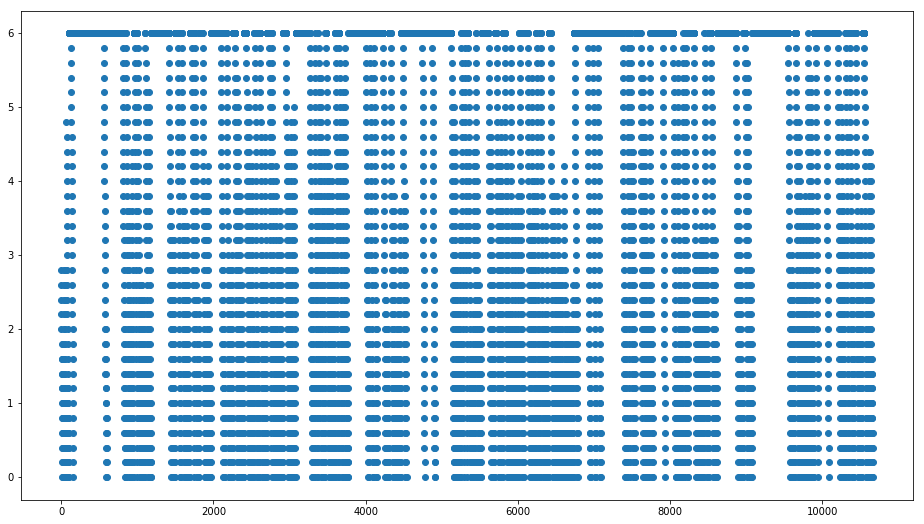

In [11]:
n = np.arange(len(train_label))
plt.figure(figsize = (16,9))
plt.scatter(n, train_label[n])
# plt.ylim([0, 0.2])
plt.show()

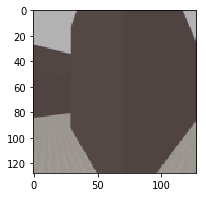

1.8000000000000005


In [20]:
# check the train image
# For single image
index = np.random.randint(len_count)
sample = train_image[index]
_sample = np.reshape(sample[0], [128,128,3])
sample_y = train_label[index]


plt.figure(figsize = (5,3))
plt.imshow(_sample / 255.)
plt.show()
print(sample_y)

6.0


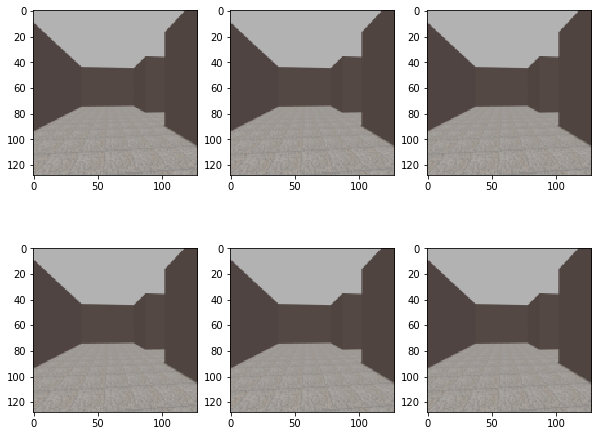

In [41]:
# check the train image
index = np.random.randint(len_count)
sample = train_image[index]
sample_y = train_label[index]
fig = plt.figure(figsize = (10,8))
for i in range(6):       
    _sample = sample[i]
    _sample = np.reshape(_sample, (128,128,3)) / 255.
    ax = fig.add_subplot(2,3,i+1)
    ax.imshow(_sample)
print(sample_y)

In [ ]:
np.save('./t2c_gazebo_data/train_sim_image_for_CNN.npy', train_image)
np.save('./t2c_gazebo_data/train_sim_label_for_CNN.npy', train_label)

Store the data